# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading Train and Test data

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
pd.options.display.float_format = '{:.3f}'.format # setting dataframe to display upto 3 places of decimal.

# Descriptive analysis

In [4]:
print(test.shape)
test.head(5)

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.000,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.000,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.000,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.000,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.000,12.000


In [5]:
print(train.shape)
train.head(5)

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000,14.000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
train.duplicated(keep="first").value_counts() # Checking if duplicates exist, Duplicates are represented by True

False    550068
dtype: int64

In [7]:
print(f'There are total {train.shape[0]-train.duplicated(keep="first").count()} duplicates in train dataset')

There are total 0 duplicates in train dataset


In [8]:
train.nunique() # number on unique values in each column

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000,550068.000,550068.000,550068.000,376430.000,166821.000,550068.000
mean,1003028.842,8.077,0.410,5.404,9.842,12.668,9263.969
std,1727.592,6.523,0.492,3.936,5.087,4.125,5023.065
min,1000001.000,0.000,0.000,1.000,2.000,3.000,12.000
25%,1001516.000,2.000,0.000,1.000,5.000,9.000,5823.000
50%,1003077.000,7.000,0.000,5.000,9.000,14.000,8047.000
75%,1004478.000,14.000,1.000,8.000,15.000,16.000,12054.000
max,1006040.000,20.000,1.000,20.000,18.000,18.000,23961.000


#### from the table above we can see that there may be outlayers in Product_Category_1 as 75% of the value are within 8 and max value is 20 

In [11]:
(train.isnull().sum()/train.shape[0])*100 # checking null value percentage in the train dataframe.

User_ID                       0.000
Product_ID                    0.000
Gender                        0.000
Age                           0.000
Occupation                    0.000
City_Category                 0.000
Stay_In_Current_City_Years    0.000
Marital_Status                0.000
Product_Category_1            0.000
Product_Category_2           31.567
Product_Category_3           69.673
Purchase                      0.000
dtype: float64

In [12]:
train["Product_Category_2"]=train["Product_Category_2"].fillna(-2.0).astype("float32")
train["Product_Category_3"]=train["Product_Category_3"].fillna(-2.0).astype("float32")
# Replacing null values in Product_Category_2 and  Product_Category_3 with a negative value (-2.0) 
# so that it doesnt affect the main data

In [13]:
train.shape

(550068, 12)

In [14]:
train['Gender'].value_counts()/train.shape[0]*100 #Distribution of gender in percentage

M   75.311
F   24.689
Name: Gender, dtype: float64

In [15]:
train['City_Category'].value_counts()/train.shape[0]*100 #Distribution of city category in percentage

B   42.026
C   31.119
A   26.855
Name: City_Category, dtype: float64

In [16]:
train['Age'].value_counts()/train.shape[0]*100 #Distribution of Age in percentage

26-35   39.920
36-45   20.000
18-25   18.118
46-50    8.308
51-55    6.999
55+      3.909
0-17     2.745
Name: Age, dtype: float64

In [17]:
train['Stay_In_Current_City_Years'].value_counts()/train.shape[0]*100 #Distribution of Stay_In_Current_City_Year gender in percentage

1    35.236
2    18.514
3    17.322
4+   15.403
0    13.525
Name: Stay_In_Current_City_Years, dtype: float64

In [18]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000,550068.000,550068.000,550068.000,550068.000,550068.000,550068.000
mean,1003028.842,8.077,0.410,5.404,6.104,2.448,9263.969
std,1727.592,6.523,0.492,3.936,6.933,7.126,5023.065
min,1000001.000,0.000,0.000,1.000,-2.000,-2.000,12.000
25%,1001516.000,2.000,0.000,1.000,-2.000,-2.000,5823.000
50%,1003077.000,7.000,0.000,5.000,5.000,-2.000,8047.000
75%,1004478.000,14.000,1.000,8.000,14.000,8.000,12054.000
max,1006040.000,20.000,1.000,20.000,18.000,18.000,23961.000


# EDA

### Univariate Analysis

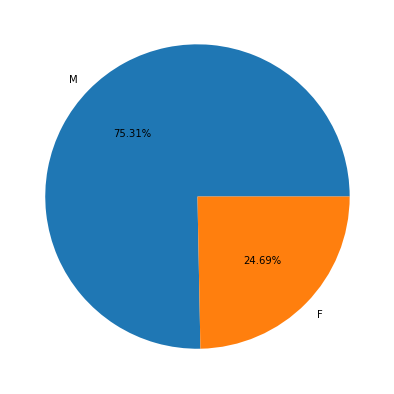

In [19]:
plt.figure(figsize = (20, 7))
plt.pie(train['Gender'].value_counts().values,labels=train['Gender'].value_counts().index,autopct='%.2f%%')
plt.show()

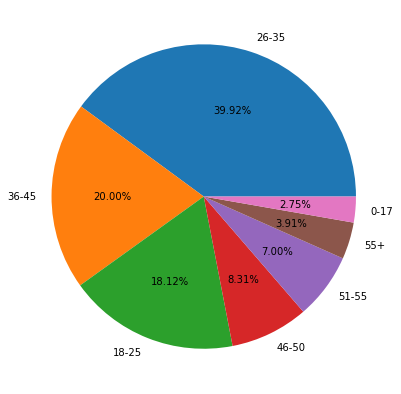

In [20]:
plt.figure(figsize = (20, 7))
plt.pie(train['Age'].value_counts().values,labels=train['Age'].value_counts().index,autopct='%.2f%%')
plt.show()

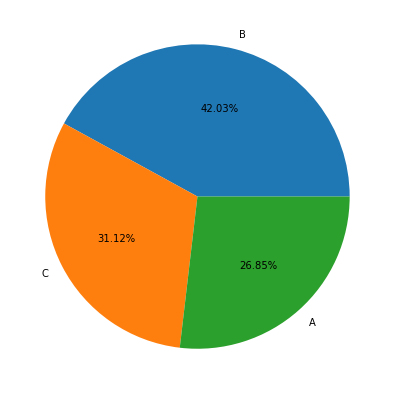

In [21]:
plt.figure(figsize = (20, 7))
plt.pie(train['City_Category'].value_counts().values,labels=train['City_Category'].value_counts().index,autopct='%.2f%%')
plt.show()

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

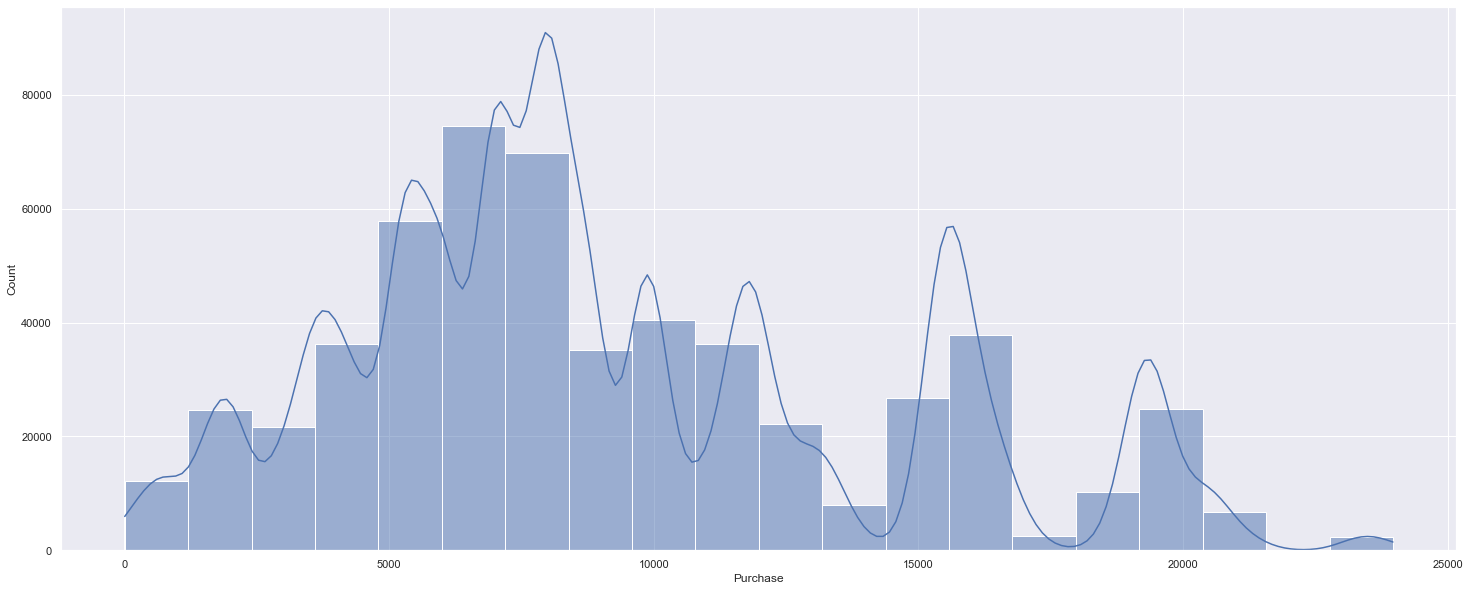

In [22]:
sns.set(rc={"figure.figsize": (25, 10)})
sns.histplot(train['Purchase'],kde=True,bins=20)

<AxesSubplot:>

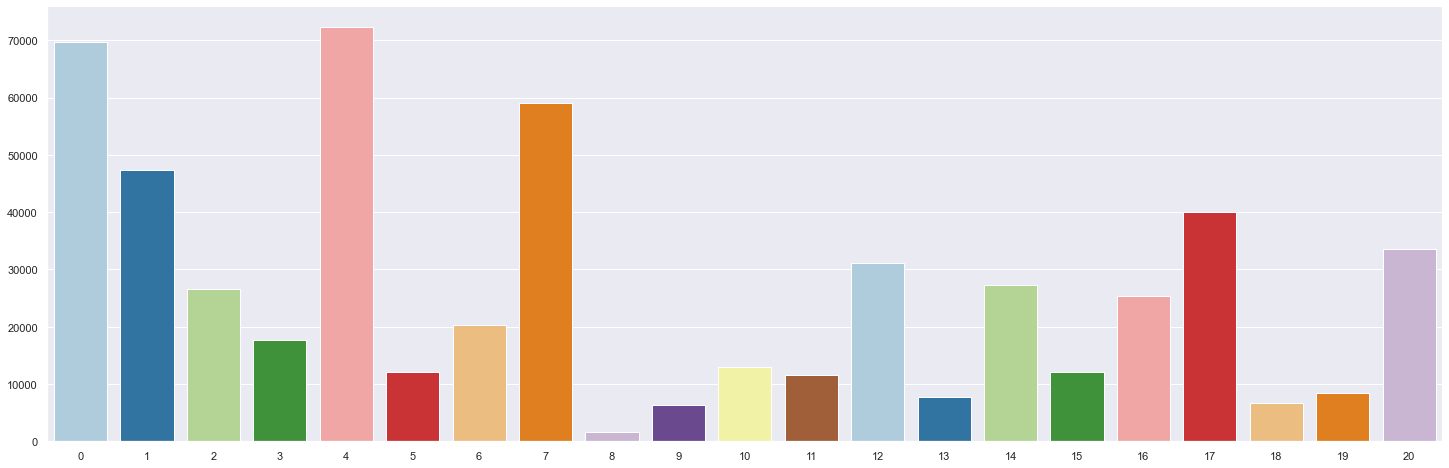

In [23]:
sns.set(rc={"figure.figsize": (25, 8)})
sns.barplot(train['Occupation'].value_counts().index,train['Occupation'].value_counts().values, palette = 'Paired')

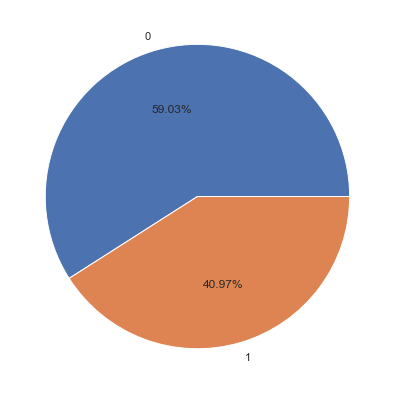

In [24]:
plt.figure(figsize = (20, 7))
plt.pie(train['Marital_Status'].value_counts().values,labels=train['Marital_Status'].value_counts().index,autopct='%.2f%%')
plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

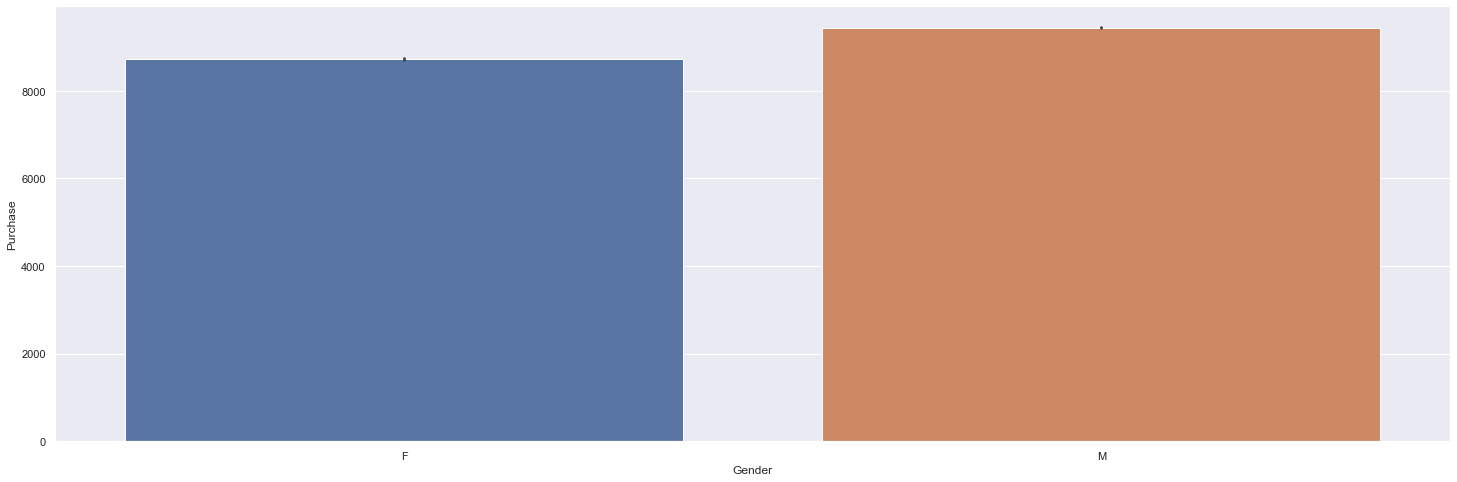

In [25]:
sns.barplot(train['Gender'],train['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

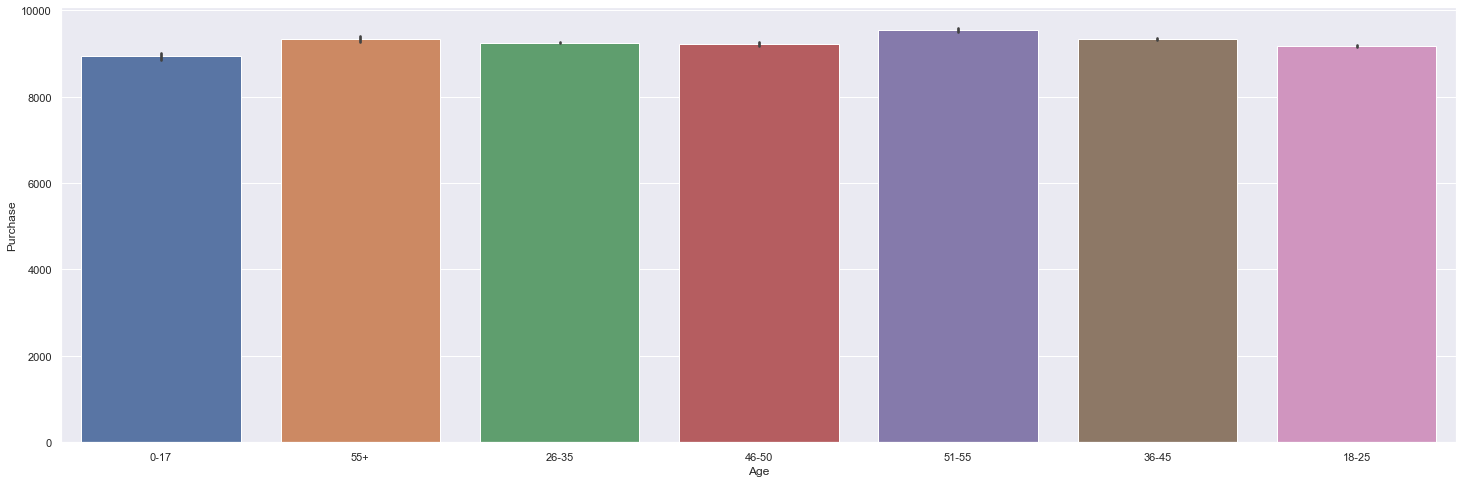

In [26]:
sns.barplot(train['Age'],train['Purchase'])

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

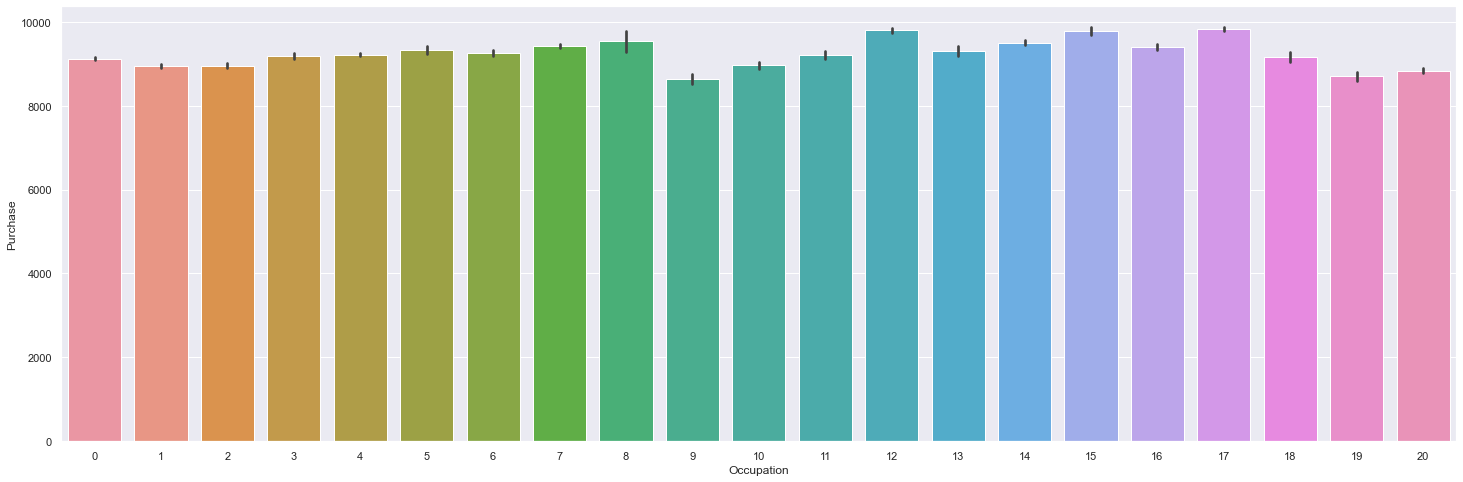

In [27]:
sns.barplot(train['Occupation'],train['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

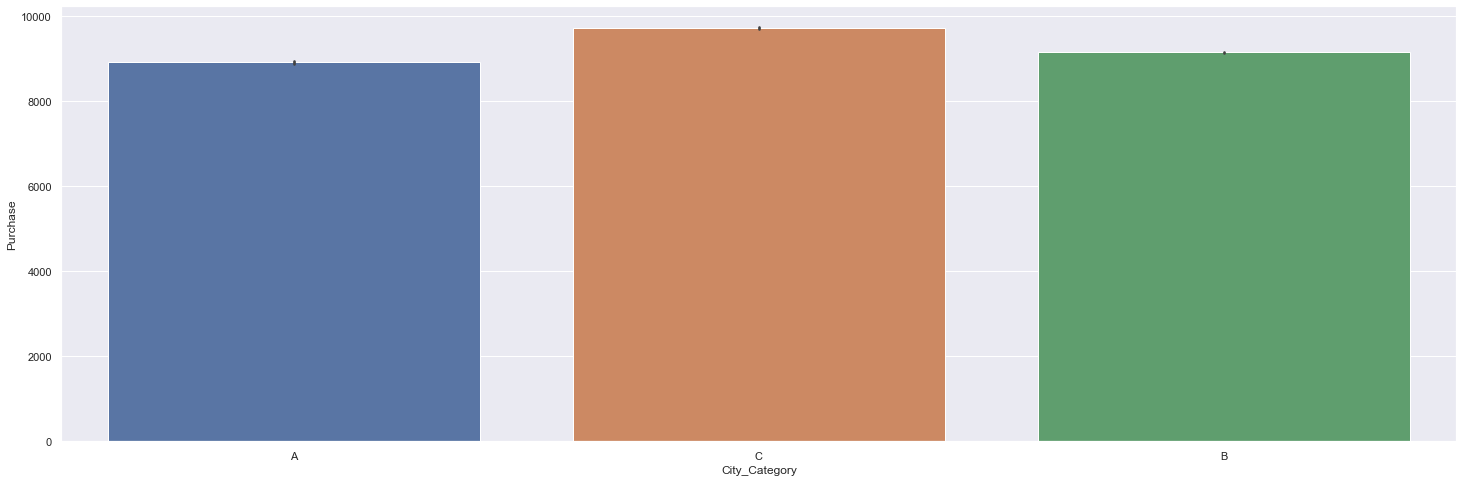

In [28]:
sns.barplot(train['City_Category'],train['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

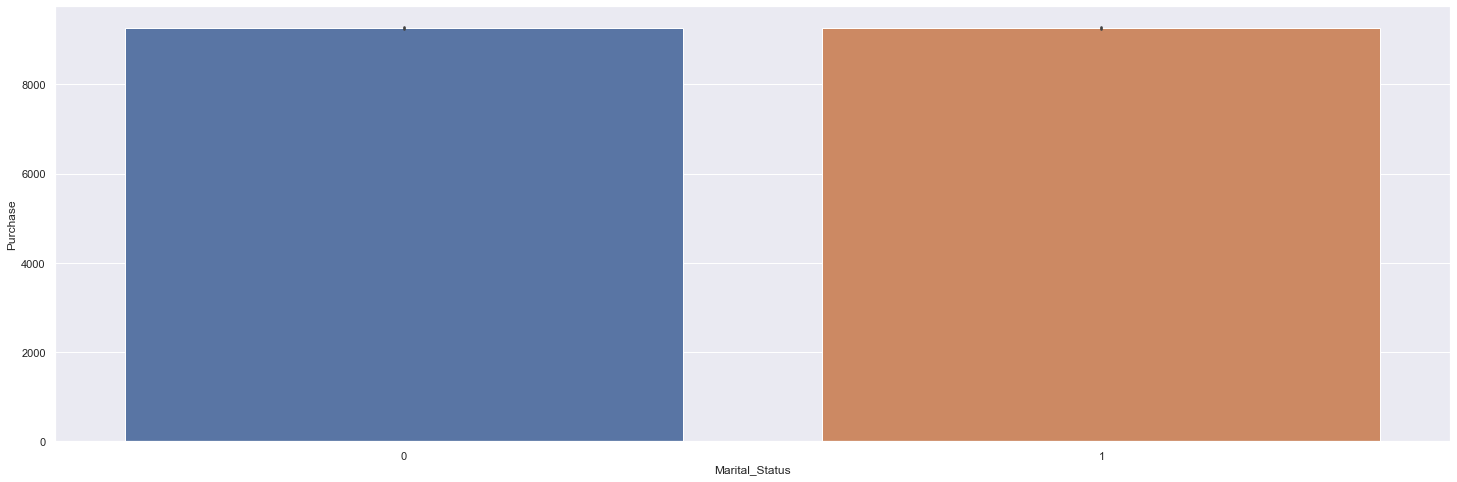

In [29]:
sns.barplot(train['Marital_Status'],train['Purchase'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

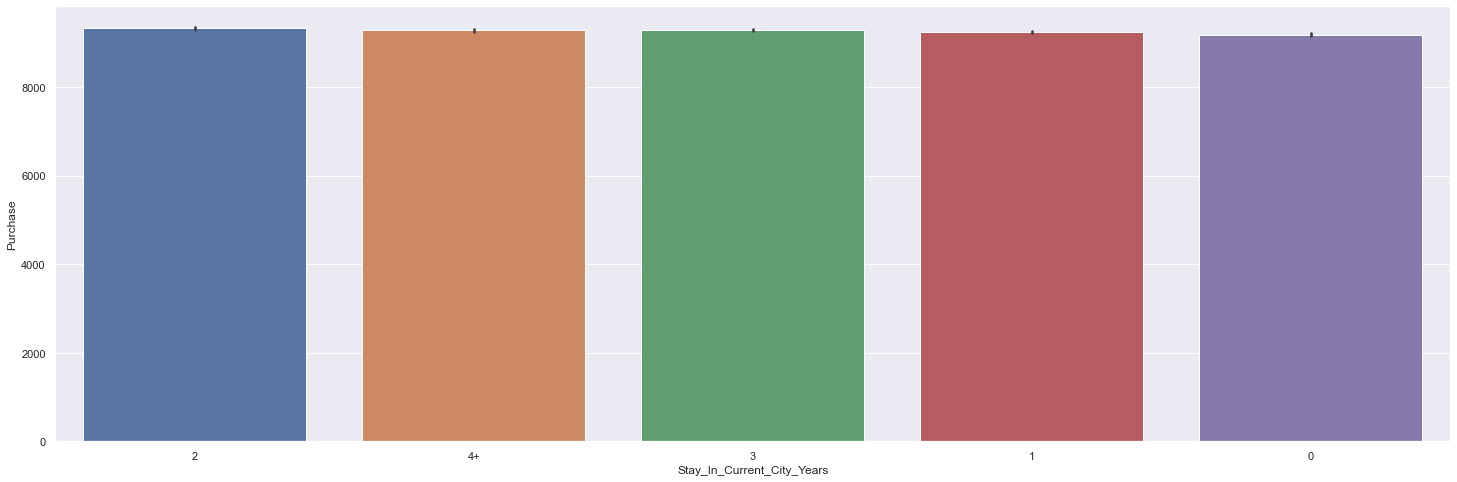

In [30]:
sns.barplot(train['Stay_In_Current_City_Years'],train['Purchase'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

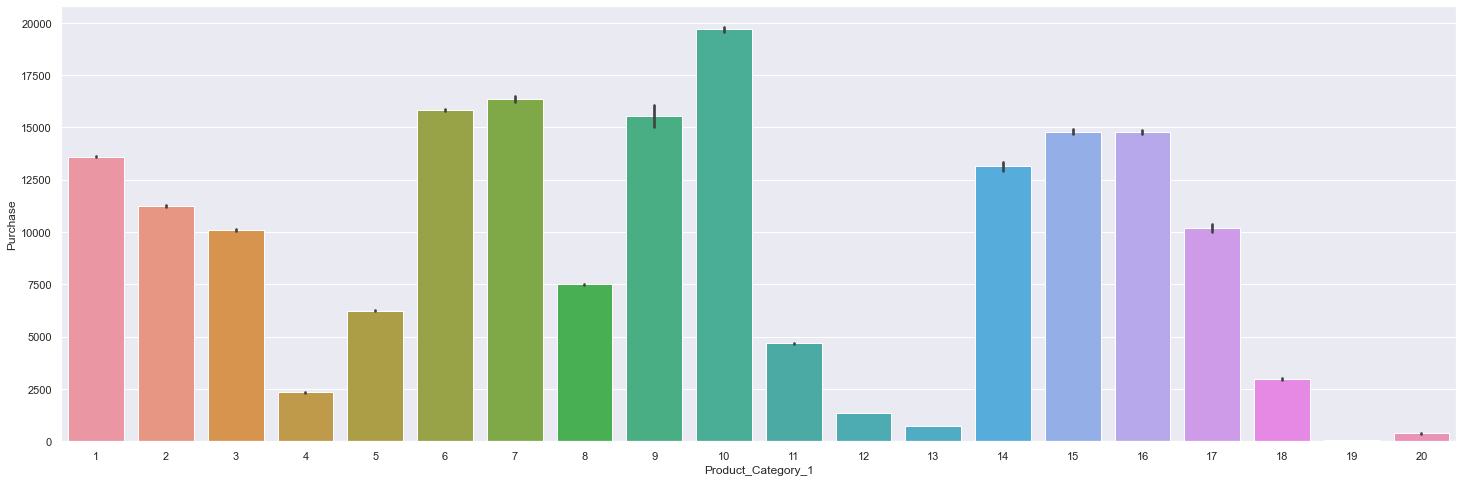

In [31]:
sns.barplot(train['Product_Category_1'],train['Purchase'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

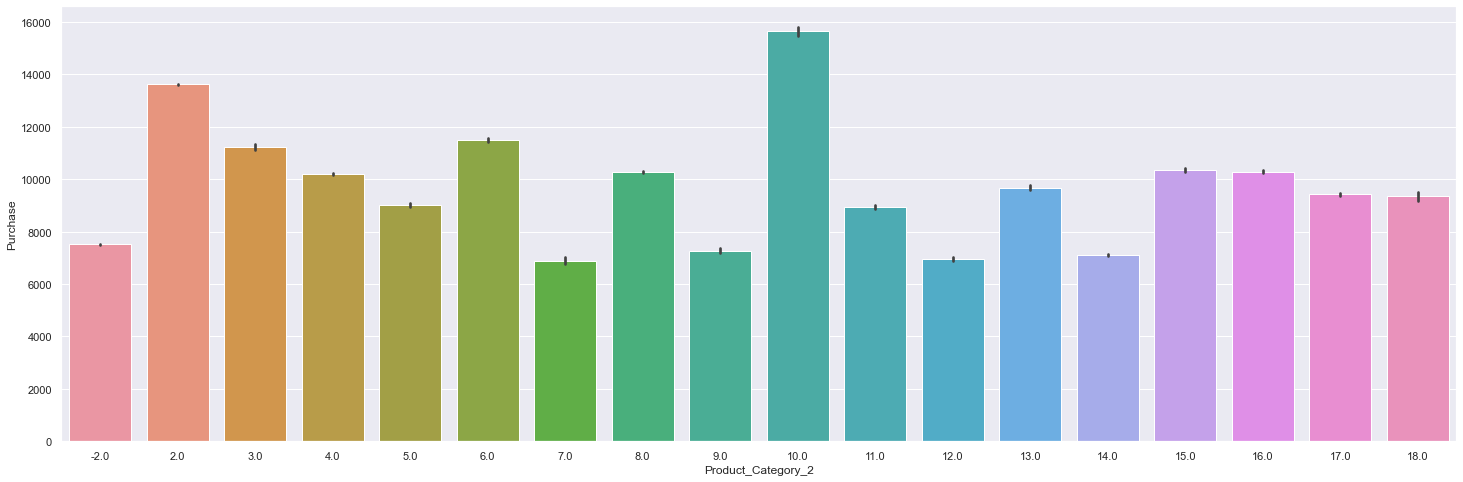

In [32]:
sns.barplot(train['Product_Category_2'],train['Purchase'])

## Multivariate Analysis

<AxesSubplot:>

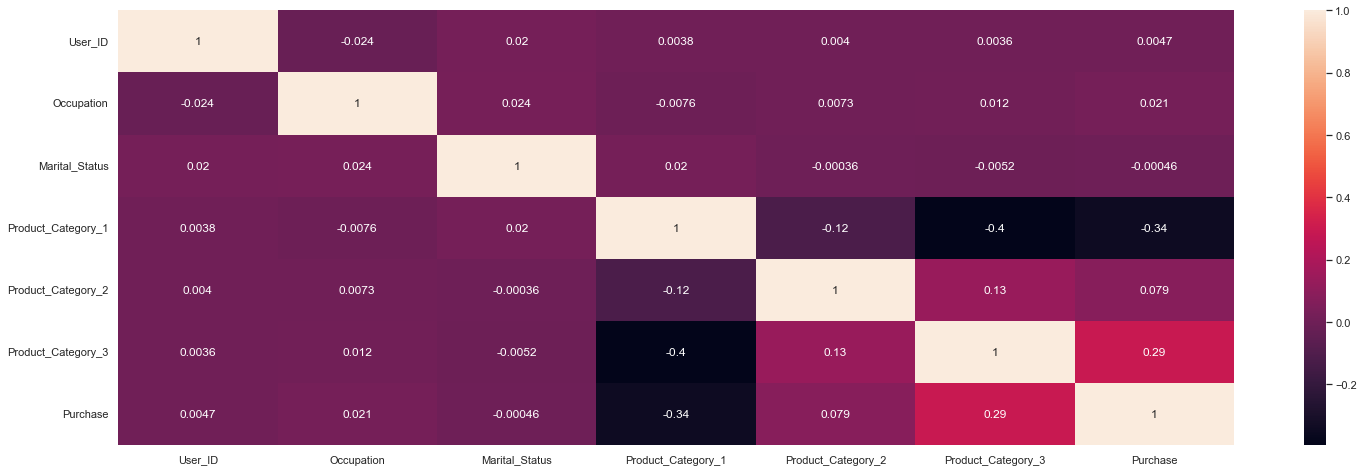

In [33]:
sns.heatmap(train.corr(), annot = True)

### Encoding Columns

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float32
 10  Product_Category_3          550068 non-null  float32
 11  Purchase                    550068 non-null  int64  
dtypes: float32(2), int64(5), object(5)
memory usage: 46.2+ MB


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
#Encoding columns with Dtype as object

le.fit(train['Product_ID'])
train['Product_ID_enc']=le.fit_transform(train['Product_ID'])

le.fit(train['Gender'])
train['Gender_enc']=le.fit_transform(train['Gender'])

le.fit(train['Age'])
train['Age_enc']=le.fit_transform(train['Age'])

le.fit(train['City_Category'])
train['City_Category_enc']=le.fit_transform(train['City_Category'])

le.fit(train['Stay_In_Current_City_Years'])
train['Stay_In_Current_City_Years_enc']=le.fit_transform(train['Stay_In_Current_City_Years'])

<AxesSubplot:>

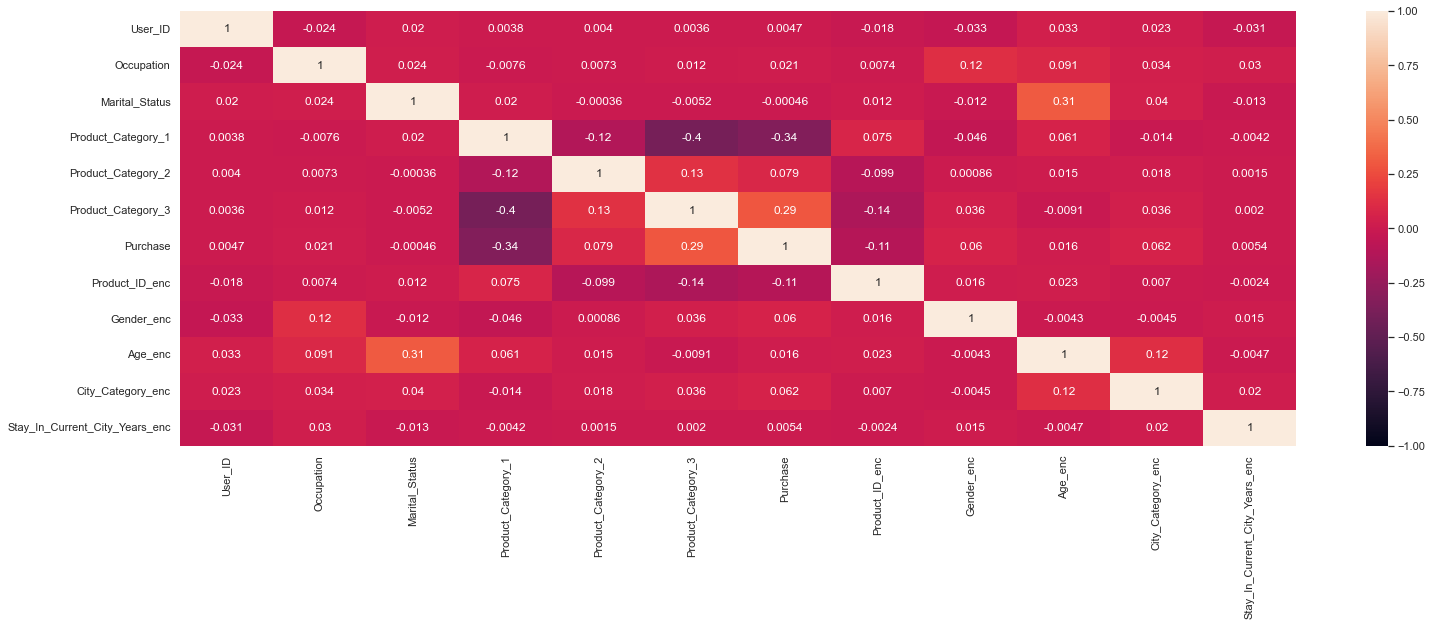

In [37]:
sns.heatmap(train.corr(), annot = True,vmax=1,vmin=-1)

# Dropping unuseful columns

In [38]:
columns_toDrop=['Marital_Status','Gender','Age','City_Category','Stay_In_Current_City_Years','Stay_In_Current_City_Years_enc','Product_ID']
train.drop(columns_toDrop,axis=1,inplace=True)

In [39]:
train.columns

Index(['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Product_ID_enc', 'Gender_enc',
       'Age_enc', 'City_Category_enc'],
      dtype='object')

In [40]:
train.shape

(550068, 10)

# Train and Validation Split

In [41]:
train_copy=train.copy(deep=True)

In [42]:
x=train.drop("Purchase",axis=1)
y=pd.DataFrame(train_copy['Purchase'])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape

(440054, 9)

In [45]:
y_train.shape

(440054, 1)

In [46]:
x_val.shape

(110014, 9)

In [47]:
y_val.shape

(110014, 1)

In [48]:
x_train.columns

Index(['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Product_ID_enc', 'Gender_enc', 'Age_enc',
       'City_Category_enc'],
      dtype='object')

In [49]:
# setting a specific fixed column order for the dataframe
col_order=['User_ID','Occupation', 'Product_Category_1', 'Product_Category_2',
           'Product_Category_3','Product_ID_enc', 'Gender_enc', 'Age_enc', 'City_Category_enc']
x_train=x_train[col_order]
x_val=x_val[col_order]

# Trainng the model

In [50]:
MSE_Score = []
R2_Score = []
Algorithm = []
CV_Score = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_val)

In [52]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
mean_squared_error(y_val, predicted, squared=False)

4603.727408197405

In [53]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_val)

In [54]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
mean_squared_error(y_val, predicted, squared=False)

3767.497036069492

In [55]:
from sklearn.neighbors import KNeighborsRegressor
Algorithm.append('KNNRegression')
regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_val)

In [56]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
mean_squared_error(y_val, predicted, squared=False)

4346.516763165843

In [57]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(x_train, y_train['Purchase'])
predicted= regressor.predict(x_val)

In [58]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
mean_squared_error(y_val, predicted, squared=False)

2792.6131848850887

In [59]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_val)

In [60]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))
mean_squared_error(y_val, predicted, squared=False)

2649.219825956855

In [61]:
comparison_list=pd.DataFrame([MSE_Score,R2_Score],columns=Algorithm)
index=pd.Index(['MSE_Score','R2_Score'])
comparison_list=comparison_list.set_index(index)
comparison_list.head()

,LinearRegression,DecisionTreeRegression,KNNRegression,RandomForestRegression,XGB Regressor
MSE_Score,21194306.049,14194033.917,18892207.972,7798688.400,7018365.686
R2_Score,0.156,0.435,0.248,0.690,0.721


## Compairing R2 scores for x_train and x_val using XGBoost

In [62]:
regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_train)
print("R2 for x_train:",(r2_score(y_train, predicted)))
predicted= regressor.predict(x_val)
print("R2 for x_train:",(r2_score(y_val, predicted)))

R2 for x_train: 0.7347252221434094
R2 for x_train: 0.7206751801655684


## Using XGBoost as it has the highest R2 score on test data

#### Prepairing test data

In [63]:
test_copy=test.copy(deep=True)
print(test.shape)
test.head(5)

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.000,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.000,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.000,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.000,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.000,12.000


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [65]:
(test.isnull().sum()/test.shape[0])*100 # checking null value percentage in the train dataframe.

User_ID                       0.000
Product_ID                    0.000
Gender                        0.000
Age                           0.000
Occupation                    0.000
City_Category                 0.000
Stay_In_Current_City_Years    0.000
Marital_Status                0.000
Product_Category_1            0.000
Product_Category_2           30.969
Product_Category_3           69.590
dtype: float64

In [66]:
train["Product_Category_2"]=train["Product_Category_2"].fillna(-2.0).astype("float32")
train["Product_Category_3"]=train["Product_Category_3"].fillna(-2.0).astype("float32")
# Replacing null values in Product_Category_2 and  Product_Category_3 with a negative value (-2.0) 
# so that it doesnt affect the main data

In [67]:
train.shape

(550068, 10)

In [68]:
#Encoding columns with Dtype as object

le.fit(test['Product_ID'])
test['Product_ID_enc']=le.transform(test['Product_ID'])

le.fit(test['Gender'])
test['Gender_enc']=le.transform(test['Gender'])

le.fit(test['Age'])
test['Age_enc']=le.transform(test['Age'])

le.fit(test['City_Category'])
test['City_Category_enc']=le.transform(test['City_Category'])

le.fit(test['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years_enc']=le.transform(test['Stay_In_Current_City_Years'])


### Dropping unuseful columns

In [69]:
columns_toDrop=['Marital_Status','Gender','Age','City_Category','Stay_In_Current_City_Years','Stay_In_Current_City_Years_enc','Product_ID']
test.drop(columns_toDrop,axis=1,inplace=True)

### Settilg column order

In [70]:
# setting a specific fixed column order for the dataframe
col_order=['User_ID','Occupation', 'Product_Category_1', 'Product_Category_2',
           'Product_Category_3','Product_ID_enc', 'Gender_enc', 'Age_enc', 'City_Category_enc']
test=test[col_order]

In [71]:
test=pd.DataFrame(test,columns=col_order)
test.describe()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_enc,Gender_enc,Age_enc,City_Category_enc
count,233599.000,233599.000,233599.000,161255.000,71037.000,233599.000,233599.000,233599.000,233599.000
mean,1003029.357,8.085,5.277,9.850,12.669,1628.838,0.752,2.498,1.043
std,1726.505,6.521,3.736,5.095,4.126,967.523,0.432,1.351,0.759
min,1000001.000,0.000,1.000,2.000,3.000,0.000,0.000,0.000,0.000
25%,1001527.000,2.000,1.000,5.000,9.000,886.000,1.000,2.000,0.000
50%,1003070.000,7.000,5.000,9.000,14.000,1574.000,1.000,2.000,1.000
75%,1004477.000,14.000,8.000,15.000,16.000,2448.000,1.000,3.000,2.000
max,1006040.000,20.000,18.000,18.000,18.000,3490.000,1.000,6.000,2.000


In [72]:
final_regressor = xgb.XGBRegressor()
final_regressor.fit(x_train, y_train)
final_predicted= regressor.predict(test)

In [73]:
final = pd.DataFrame()
final['Purchase']=final_predicted
final['User_ID']=test_copy['User_ID']
final['Product_ID']=test_copy['Product_ID']

In [74]:
final.head()

,Purchase,User_ID,Product_ID
0,13104.815,1000004,P00128942
1,11620.229,1000009,P00113442
2,6405.294,1000010,P00288442
3,3292.766,1000010,P00145342
4,2966.768,1000011,P00053842


In [75]:
final.to_csv('FinalSubmission.csv',index=False)